## Question 2 Part B: Exercise 5.4
Part A of 5.4 asks to write a Python funtion that calculate the Bessel functions using Simpson's Rule for 1000 points. Then this function will make a plot of three Bessel functions as a function of $x$ from $x=0$ to $x=20$

In [2]:
import scipy.special as spy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
def J(m,x):
    """
    A function that computes Bessel Functions using Simpson's Rule
    INPUT:
    m [int] subscript of Bessel function
    x [array] the array of input values
    """
    def Bessel(m,x,theta):
        y = np.cos(m*theta - x*np.sin(theta))
        return y
    N = 10000
    a = 0.
    b = np.pi
    h = (b-a)/N #width of slices

    s = Bessel(m,x,a) + Bessel(m,x,b) #the constant terms in the series expansion defining the trapezoid rule as in equation 5.3 of Newman
    for k in range(1,N,2): #loop over odd terms
        s += 4*Bessel(m,x,a+k*h)
    for k in range(2,N,2): #loop over even terms
        s += 2*Bessel(m,x,a+k*h) 
    the_integral = h*s/(3*np.pi)
    return the_integral

In [4]:
x = np.linspace(0,20,1000)
m_len = 3
bessel_val = np.empty((len(x),m_len))
for m in range(m_len):
    bessel_val[:,m] = J(m,x)
#print(bessel_val[:,2])
    

In [5]:
x = np.linspace(0,20,1000)
m_len = 3
scipy_val = np.empty((len(x),m_len))
for m in range(m_len):
    scipy_val[:,m] = spy.jv(m,x)

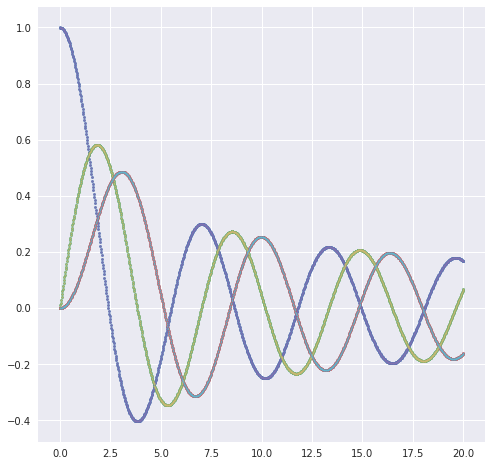

In [6]:
plt.figure(figsize = (8,8))
plt.scatter(x, bessel_val[:,0]/bessel_val[0,0], s = 6)
plt.scatter(x, bessel_val[:,1]/bessel_val[0,0], s = 6)
plt.scatter(x, bessel_val[:,2]/bessel_val[0,0], s =6)
plt.scatter(x, scipy_val[:,0]/scipy_val[0,0], s = 2, alpha = 0.8)
plt.scatter(x, scipy_val[:,1]/scipy_val[0,0], s = 2, alpha = 0.8)
plt.scatter(x, scipy_val[:,2]/scipy_val[0,0], s =2, alpha = 0.8)
plt.show()

# 5.4b 
This question asks us to compute a density plot of the intensity of the different diffraction patterns that come from a point light source with $\lambda=500$. The question asks us to look in a square region of the focal plane. The formula used is 
\begin{equation}
I(r)=\frac{J_1(kr)}{kr}^2
\end{equation}
The radius range will be $0  \text{ to } 1\mu\text{m}$

In [14]:
def I(r):
    wavelength = 500e-9
    k = np.pi/wavelength
    return (J(1,k*r)/(k*r))**2

In [26]:
x = np.linspace(0,1e-3,50)
y = np.linspace(0,1e-3,50)
r = np.sqrt(x**2+y**2)
a_intensity = np.empty(50)
a_intensity[0] = 1/2
a_intensity[1:50] = I(r[1:50])
Intensity = np.meshgrid(a_intensity)

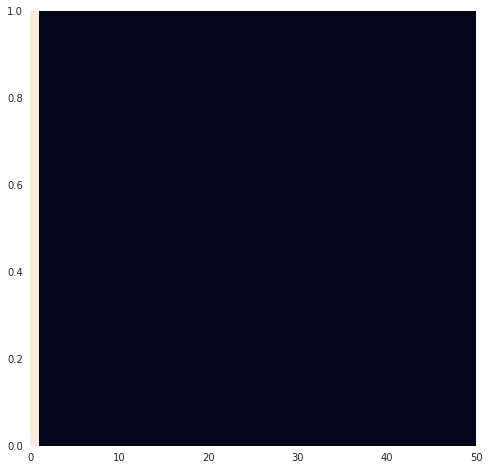

In [27]:
plt.figure(figsize = (8,8))
plt.pcolormesh(Intensity)
plt.show()